## Decision Tree Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

In [2]:
pd.set_option('display.max_rows', 75)
pd.set_option('display.max_columns', 75)

### About data

Датасет Telco Customer Churn представляет собой набор данных, включающий информацию о 7043 клиентах вымышленной телекоммуникационной компании, предоставлявшей услуги домашней телефонной связи и доступа к интернету в Калифорнии в течение третьего квартала. В данных отражены сведения о статусе клиентов (остались, ушли или подписались на услуги), при этом каждая строка соответствует отдельному абоненту, а каждый столбец содержит характеристики, описывающие его профиль и параметры обслуживания:

**customerID** - Customer ID  
**gender** - Whether the customer is a male or a female  
**SeniorCitizen** - Whether the customer is a senior citizen or not (1, 0)  
**Partner** - Whether the customer has a partner or not (Yes, No)  
**Dependents** - Whether the customer has dependents or not (Yes, No)  
**tenure** - Number of months the customer has stayed with the company  
**PhoneService** - Whether the customer has a phone service or not (Yes, No)  
**MultipleLines** - Whether the customer has multiple lines or not (Yes, No, No phone service)  
**InternetService** - Customer’s internet service provider (DSL, Fiber optic, No)  
**OnlineSecurity** - Whether the customer has online security or not (Yes, No, No internet service)  
**OnlineBackup** - Whether the customer has online backup or not (Yes, No, No internet service)
**DeviceProtection** - Whether the customer has device protection or not (Yes, No, No internet service)  
**TechSupport** - Whether the customer has tech support or not (Yes, No, No internet service)  
**StreamingTV** - Whether the customer has streaming TV or not (Yes, No, No internet service)  
**StreamingMovies** - Whether the customer has streaming movies or not (Yes, No, No internet service)  
**Contract** - The contract term of the customer (Month-to-month, One year, Two year)  
**PaperlessBilling** - Whether the customer has paperless billing or not (Yes, No)  
**PaymentMethod** - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card   
**MonthlyCharges** - The amount charged to the customer monthly  
**TotalCharges** - The total amount charged to the customer  
**Churn** - Whether the customer churned or not (Yes or No)  

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis

В представленном наборе данных содержатся как числовые, так и категориальные признаки, при этом большинство переменных относится к категориальному типу. Пропуски в данных отсутствуют.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Cтатистические метрики для числовых колонок.   

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Целевая переменная.

In [8]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Наблюдается несбалансированность классов. Соотношение составляет примерно 2.76:1 (5163/1869) ≈ 2.76

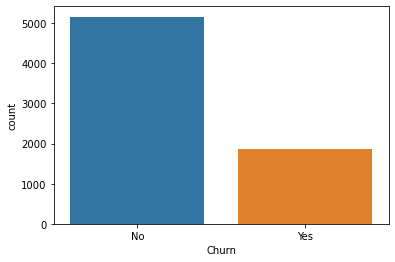

In [9]:
sns.countplot(data =df, x ='Churn');

**Распределение общих затрат (TotalCharges) в зависимости от факта оттока (Churn = Yes/No).**

1. Ушедшие клиенты (Churn = Yes) имеют, как правило, более низкие общие затраты:  

 - у них медиана и большая часть распределения сосредоточены в нижней части шкалы TotalCharges;  

 - это говорит о том, что чаще уходят новые клиенты с коротким сроком пребывания.  

2. Оставшиеся клиенты (Churn = No) имеют более широкий диапазон TotalCharges:  

 - распределение растянуто вверх;  

 - много клиентов с большими суммарными затратами (что закономерно, так как они дольше остаются с компанией).  

3. Форма распределения:  

 - для Churn = Yes наблюдается сосредоточение в области до 2000 и далее резкий спад;  

 - для Churn = No распределение более равномерное и вытянутое до ~9000.  


Результаты анализа показывают, что клиенты с низкими совокупными затратами чаще подвержены оттоку, что, вероятно, связано с их небольшой продолжительностью взаимодействия с компанией. В то же время клиенты с высоким уровнем TotalCharges демонстрируют значительную приверженность и реже уходят.

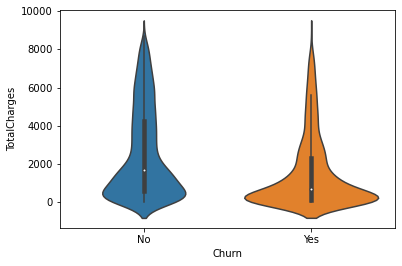

In [10]:
sns.violinplot(y='TotalCharges', x='Churn', data=df);

**Распределение TotalCharges (общие затраты клиента) в разрезе типов контрактов (Month-to-month, One year, Two year) с учетом факта оттока (Churn = Yes/No).**

1. Month-to-month (помесячный контракт):

 - Наибольшая доля клиентов с оттоком находится именно здесь.  

 - У клиентов с оттоком (оранжевые боксы) медиана заметно ниже по сравнению с оставшимися.  

 - Наблюдается много выбросов среди тех, кто не ушел, что указывает на долгосрочных пользователей даже в этой категории.  

2. One year (годовой контракт):  

 - Клиенты с годовым контрактом в среднем имеют более высокие TotalCharges, чем month-to-month.  

 - Отток присутствует, но его распределение ближе к неушедшим клиентам, чем в первой группе.  

 - Это указывает, что годовой контракт снижает вероятность ухода.  

3. Two year (двухлетний контракт):  

 - У клиентов почти нет оттока (оранжевый бокс маленького размера).  

 - Те, кто остается, имеют высокие TotalCharges, что отражает долгую продолжительность взаимодействия с компанией.  

 - Контракт на два года является самым "стабилизирующим" фактором против оттока.  


Распределение совокупных затрат показывает, что клиенты с помесячными контрактами значительно более склонны к оттоку, особенно при низких значениях TotalCharges. Напротив, годовые и двухгодичные контракты демонстрируют заметно меньшую долю ушедших клиентов, при этом у двухгодичных контрактов уровень оттока минимален.

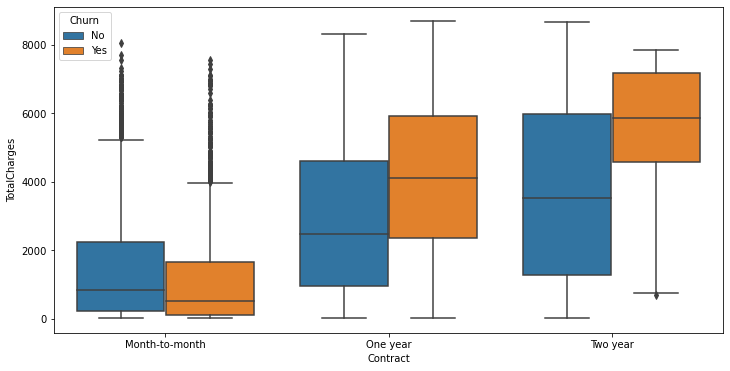

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(y='TotalCharges', x='Contract', data=df, hue='Churn');

**Корреляция между признаками и целевой переменной.** 

Корреляционный анализ выявил, что наиболее значимыми факторами, повышающими вероятность оттока, являются помесячный контракт, отсутствие дополнительных услуг (онлайн-безопасность, техническая поддержка, резервное копирование) и  использование электронных чеков в качестве метода оплаты.  
В то же время долгосрочные договоры, наличие дополнительных сервисов и автоматические способы оплаты оказывают выраженный удерживающий эффект и снижают вероятность ухода клиентов.

In [12]:
lst = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

df_objs = pd.get_dummies(df[lst])
df_corr = df_objs.corr()['Churn_Yes'].sort_values(ascending = False)
df_corr

Churn_Yes                                  1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Female                              0.008545
gender_Male 

Положительные значения демонсрир прямую связь с оттоком (увеличивают вероятность ухода), а отрицательные — обратную связь (снижают вероятность ухода).

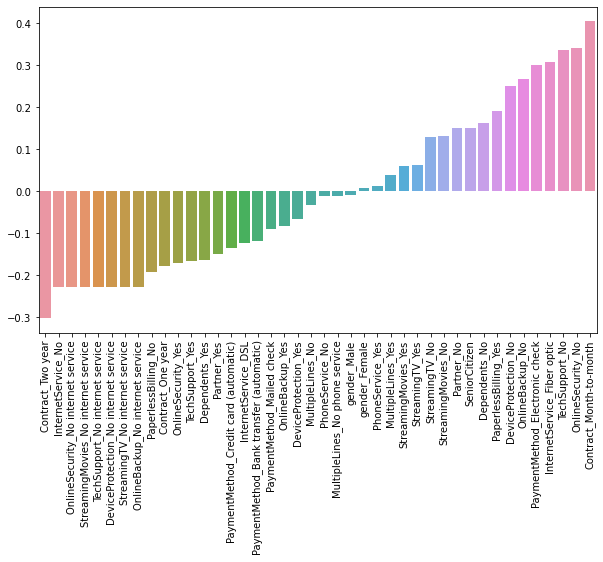

In [13]:
coefs = pd.Series(df_corr.drop(['Churn_Yes','Churn_No']))
coefs = coefs.sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90);

## Анализ оттока клиентов (Customer Churn Analysis)

Типы договоров.

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Распределение признака tenure (количество месяцев, проведённых клиентом в компании).**

1. Ярко выраженные пики:  

 - 1–2 месяца — максимальное количество клиентов уходит или перестаёт пользоваться услугами почти сразу после подключения. Это может быть связано с неудовлетворённостью качеством услуг или тарифами.  

 - 72 месяца (6 лет) — ещё один значительный пик. Это связано с тем, что часть клиентов остаётся с компанией на максимально возможный срок, и такие значения фиксируются массово.  

2. Равномерное распределение в середине:  

 - В интервале примерно от 10 до 60 месяцев количество клиентов на каждом месяце относительно низкое и распределено более равномерно.

 - Это говорит о постепенном, "естественном" оттоке и меньшей концентрации клиентов на промежуточных сроках.

3. Закономерность:  

 - График демонстрирует, что значительная часть клиентов уходит в самом начале жизненного цикла (короткий срок сотрудничества).  

 - В то же время существует устойчивая группа лояльных клиентов, которые остаются до конца максимально возможного периода (72 месяца).  


Распределение признака tenure указывает на наличие двух противоположных групп клиентов: тех, кто покидает компанию в первые месяцы после подключения, и тех, кто демонстрирует высокую лояльность и остаётся на протяжении всего периода сотрудничества. Клиенты со средним сроком пребывания представлены в меньшем количестве и распределены относительно равномерно.

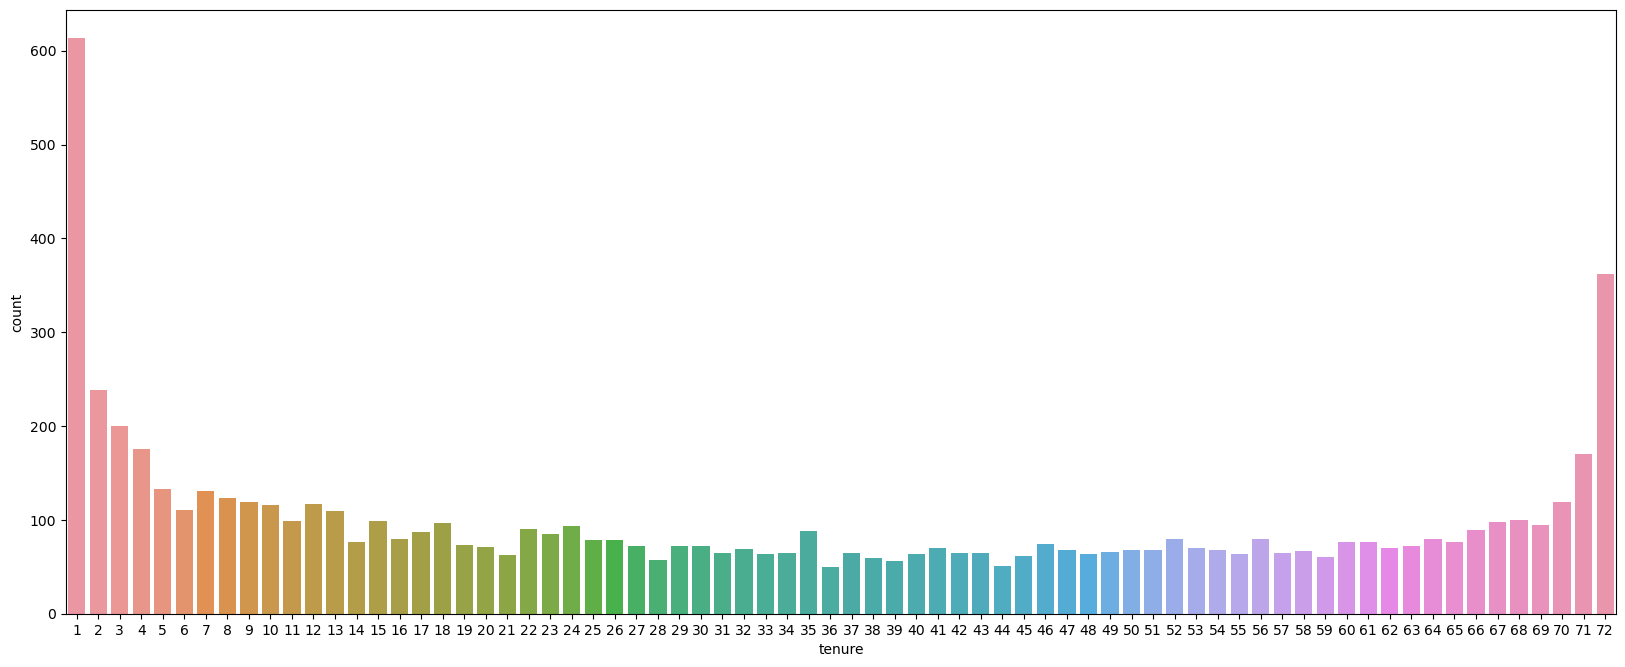

In [15]:
plt.figure(figsize=(20,8),dpi=100)
sns.countplot(x='tenure', data=df);

**Распределение длительности пребывания клиентов (tenure) в разрезе типов контрактов (Month-to-month, One year, Two year) и факта оттока (Churn: Yes/No).**

Основные наблюдения:  

1. Помесячные контракты (Month-to-month):  

 - Среди клиентов без оттока (верхний левый график) распределение tenure постепенно убывает.  

 - Среди клиентов, ушедших в отток (нижний левый график), ярко выражен пик на самых ранних сроках (1–2 месяца), что подтверждает высокий риск оттока в начале взаимодействия.  

2. Годовые контракты (One year):  

 - Удержанные клиенты (верхний центр) равномерно распределены по сроку до окончания контракта.  

 - Клиенты, ушедшие в отток (нижний центр), в основном покидают компанию в первые месяцы контракта, а затем частота резко падает.  

2. Двухгодовые контракты (Two year):  

 - Удержанные клиенты (верхний правый график) демонстрируют ярко выраженный пик в районе максимального срока (72 месяца), что указывает на долгосрочную лояльность.  

 - Среди ушедших (нижний правый график) количество клиентов минимально, что подтверждает низкий отток при долгосрочных договорах.  

Вывод:   

- Основной риск оттока сосредоточен у клиентов с помесячным контрактом, особенно в первые месяцы.  

- Годовые контракты более стабильны, но всё же часть клиентов уходит в начале.  

- Двухгодовые контракты почти полностью защищают от оттока: отток здесь минимален и не носит массового характера.  

<Figure size 2000x600 with 0 Axes>

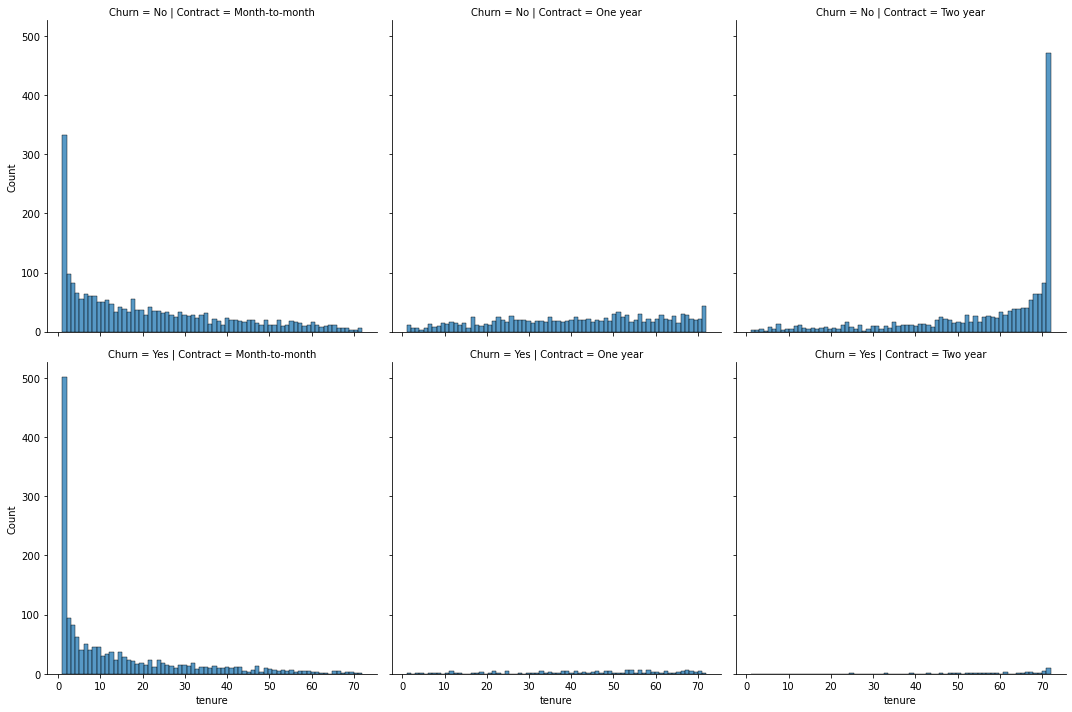

In [16]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Зависимость между ежемесячными расходами абонентов и их совокупными затратами за весь период.**  

- Абоненты с низкими совокупными затратами (краткосрочные клиенты) чаще уходят в отток.

- Долгосрочные клиенты с высокими совокупными затратами демонстрируют минимальный уровень оттока.

- Вероятность оттока выше среди клиентов с высокими ежемесячными платежами.

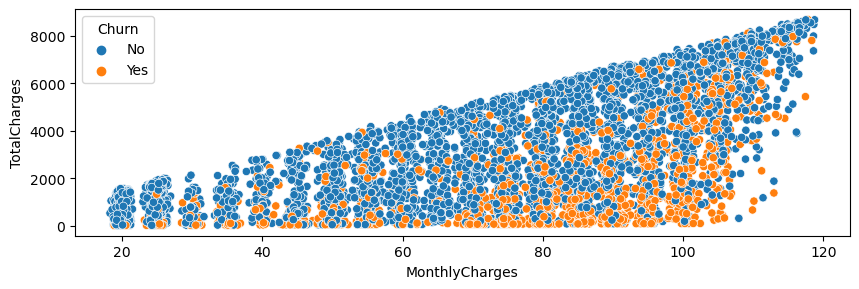

In [17]:
plt.figure(figsize=(10,3),dpi=100)
sns.scatterplot(y=df['TotalCharges'], x=df['MonthlyCharges'], hue=df['Churn']);

**Анализ коэффициента оттока (Churn rate) в разрезе когорт, сформированных по длительности обслуживания от 1 до 72 месяцев**, демонстрирует устойчивую тенденцию к снижению уровня оттока по мере увеличения срока пребывания клиента. Иными словами, вероятность ухода наиболее высока на ранних этапах взаимодействия, тогда как с ростом длительности обслуживания риск оттока существенно сокращается.

In [18]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
6     36.363636
7     38.931298
8     34.146341
9     38.655462
10    38.793103
11    31.313131
12    32.478632
13    34.862385
14    31.578947
15    37.373737
16    35.000000
17    29.885057
18    24.742268
19    26.027397
20    25.352113
21    26.984127
22    30.000000
23    15.294118
24    24.468085
25    29.113924
26    18.987342
27    18.055556
28    21.052632
29    20.833333
30    22.222222
31    24.615385
32    27.536232
33    21.875000
34    18.461538
35    17.045455
36    20.000000
37    23.076923
38    22.033898
39    25.000000
40    20.312500
41    20.000000
42    21.538462
43    23.076923
44    11.764706
45     9.836066
46    16.216216
47    20.588235
48    14.062500
49    22.727273
50    14.705882
51    11.764706
52    10.000000
53    20.000000
54    19.117647
55    14.062500
56    12.500000
57    12.307692
58    16.417910
59    13.333333
60     7.894737
61    10.526316
62     7.142857
6

**Распределение процента оттока по месяцам:**  

- В первые месяцы после подключения фиксируется максимальный уровень оттока, достигающий 50–60%.  
- По мере увеличения срока обслуживания доля оттока постепенно снижается, стабилизируясь в диапазоне 20–30%.
- Долгосрочные клиенты (более 40 месяцев) демонстрируют значительно более низкий уровень оттока, нередко не превышающий 10%.

Полученные результаты указывают на критическую значимость первых месяцев взаимодействия с клиентом для формирования его дальнейшей лояльности.

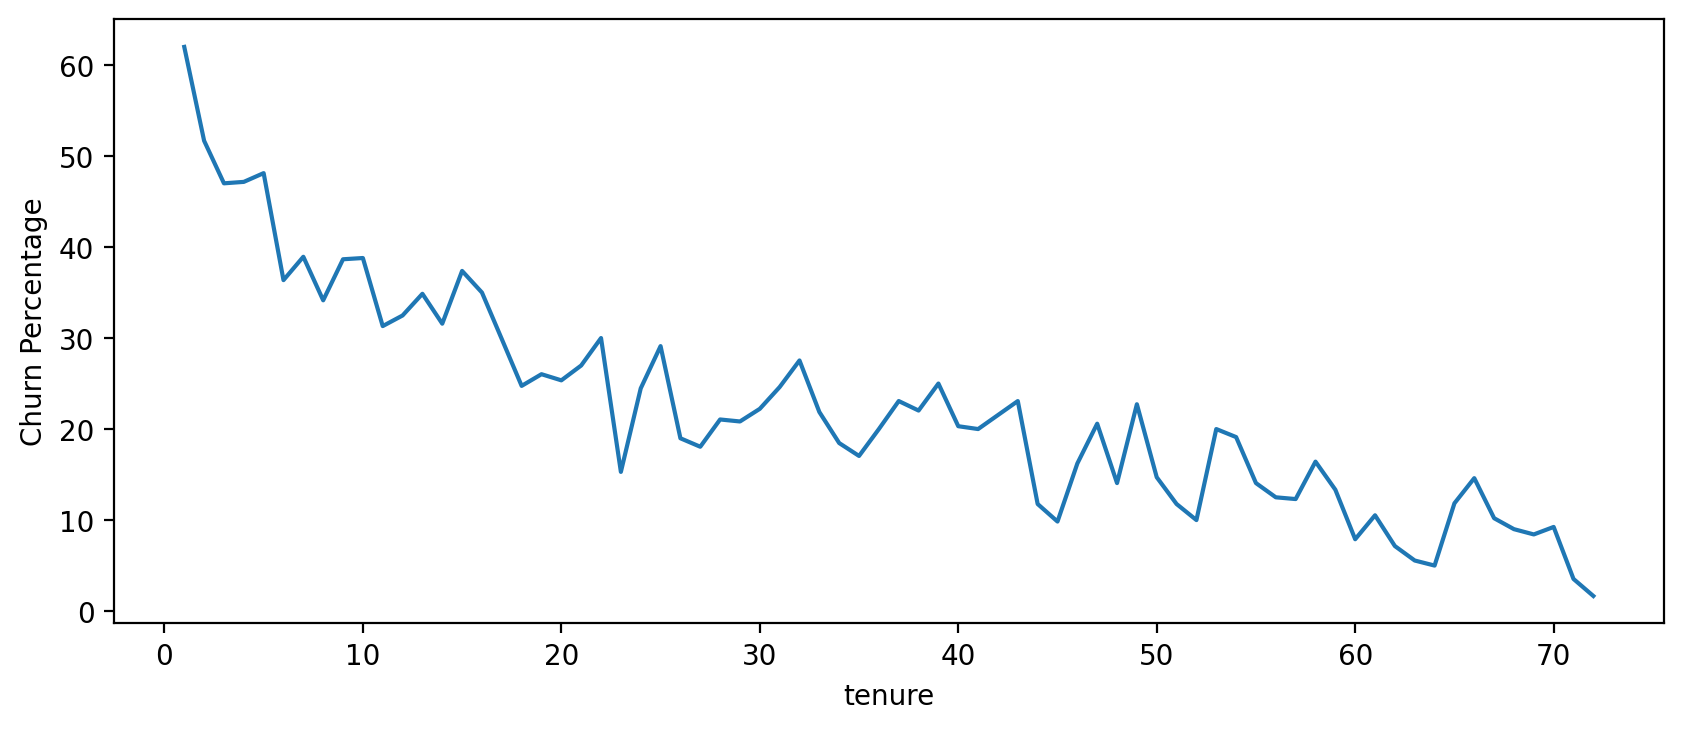

In [19]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

В целях проведения дальнейшего исследования создадим более крупные когорты (сегменты).

In [20]:
def get_cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [21]:
df['Tenure Cohort'] = df['tenure'].apply(get_cohort)
df[['Tenure Cohort','tenure']].head(10)

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
5,0-12 Months,8
6,12-24 Months,22
7,0-12 Months,10
8,24-48 Months,28
9,Over 48 Months,62


**Распределение клиентов по когортам (tenure cohorts) относительно ежемесячных и совокупных затрат.**  

- Когортный анализ показывает чёткую стратификацию клиентов по совокупным затратам в зависимости от длительности обслуживания.  
- Абоненты с коротким сроком обслуживания (0–12 месяцев) характеризуются низким уровнем накопленных затрат, даже при высоких ежемесячных платежах.  
- Клиенты со стажем 12–48 месяцев формируют промежуточный уровень совокупных затрат.  
- Долгосрочные абоненты (более 48 месяцев) обеспечивают наибольший объём совокупных затрат и представляют наиболее ценную часть клиентской базы.  

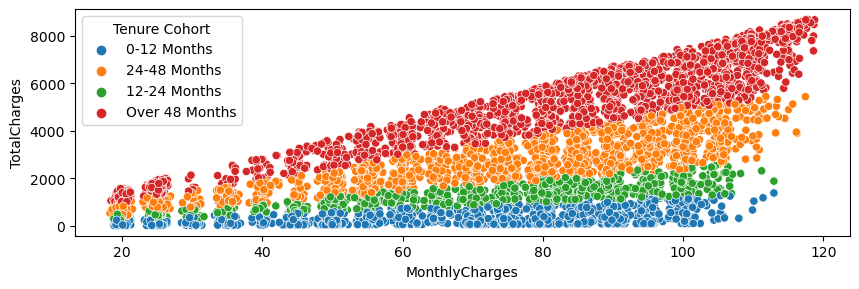

In [22]:
plt.figure(figsize=(10,3),dpi=100)
sns.scatterplot(y=df['TotalCharges'], x=df['MonthlyCharges'], hue=df['Tenure Cohort']);

**Связь между когортами клиентов по сроку обслуживания (Tenure Cohort) и их склонностью к оттоку (Churn).**  

- Основной риск оттока приходится на клиентов в первые 12 месяцев обслуживания.  
- После второго года уровень оттока существенно снижается.  
- Долгосрочные абоненты (срок > 48 месяцев) представляют наиболее стабильную и лояльную клиентскую базу.  

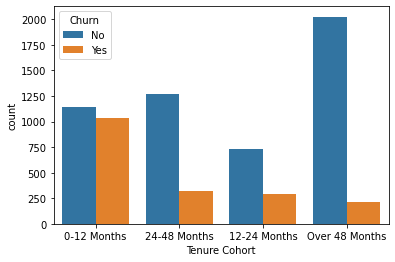

In [23]:
sns.countplot(data =df, x ='Tenure Cohort', hue = 'Churn');

**Распределение оттока по типам контрактов (месяц к месяцу, один год, два года) в разрезе когорт по сроку обслуживания.**  

- Тип контракта является ключевым фактором, определяющим вероятность оттока.  
- Клиенты с помесячными контрактами наиболее склонны к уходу, особенно в первые месяцы.  
- Долгосрочные контракты (один и два года) существенно снижают вероятность оттока, обеспечивая более стабильные клиентские отношения. 
- Контракт на два года практически устраняет риск массового оттока и формирует ядро наиболее лояльных клиентов.  

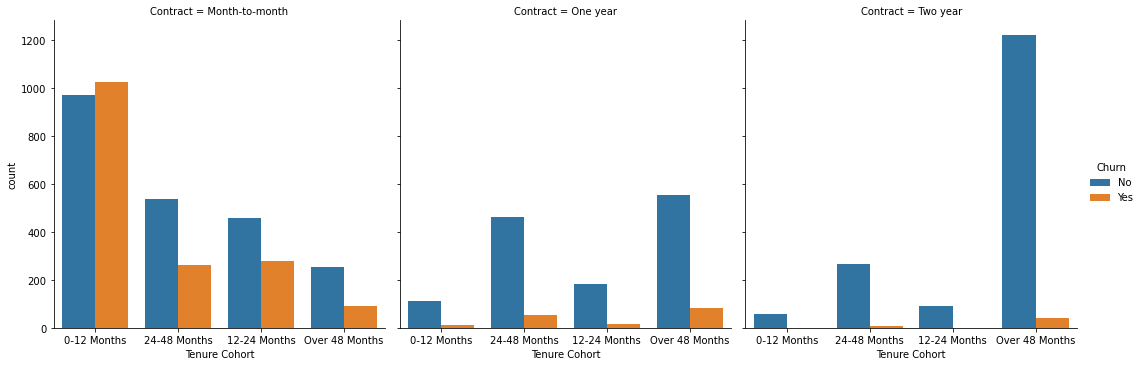

In [24]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

# Предиктивная модель

В рамках исследования необходимо провести сравнительный анализ четырёх алгоритмов машинного обучения на основе деревьев решений:   
- одиночного дерева решений,   
- случайного леса,   
- адаптивного бустинга   
- градиентного бустинга.   
  
Цель: создать модель предсказания, уйдёт ли абонент в отток (churn).

In [25]:
df = pd.read_csv('D:/Machine Learning/Новая папка/_DATA/Telco-Customer-Churn.csv')

# 1. Подготовка данных
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)

# 2. Преобразуем метки: 'No' → 0, 'Yes' → 1
y = df['Churn'].map({'No': 0, 'Yes': 1})

# 3. Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=101, stratify=y
)

 **- DecisionTreeClassifier**

In [26]:
# 4. Инициализируем модель
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# 5. Сетка гиперпараметров
param_grid = {
    'max_depth': [3, 5, 6, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# 6. GridSearch с метрикой f1
grid_dt = GridSearchCV(dt_model, param_grid, scoring='f1', cv=5)
grid_dt.fit(X_train, y_train)

# 7. Предсказания
predictions_dt = grid_dt.predict(X_test)

# 8. Оценка качества
print(classification_report(y_test, predictions_dt, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.89      0.75      0.81       517
         Yes       0.51      0.74      0.61       187

    accuracy                           0.74       704
   macro avg       0.70      0.74      0.71       704
weighted avg       0.79      0.74      0.76       704



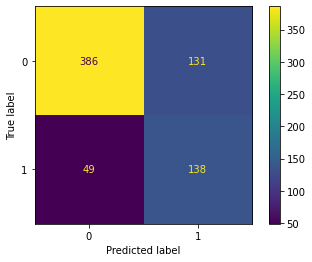

In [27]:
cm_dt = confusion_matrix(y_test, predictions_dt, labels=grid_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=grid_dt.classes_)
disp.plot()
plt.show()

 **- RandomForestClassifier**

In [28]:
# 4. Инициализируем модель
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')

# 5. Сетка гиперпараметров (диапазоны)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],   # Количество деревьев
    'max_depth': [5, 10, 15, 20, None],          # Глубина деревьев
    'min_samples_split': [2, 5, 10, 20],         # Минимум для разбиения
    'min_samples_leaf': [1, 2, 4, 8],            # Минимум для листьев
    'max_features': ['sqrt', 'log2', None],      # Количество признаков
    'class_weight': ['balanced', None],          # Веса классов
    'bootstrap': [True, False]                   # Бутстрап
}

# 6. RandomizedSearch с метрикой f1
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=100,              # Кол-во случайных комбинаций (вместо всех 1296)
    scoring='f1',            # Метрика
    cv=5,                    # Кросс-валидация
    n_jobs=-1,               # Все ядра процессора
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

# 7. Предсказания
predictions_rfc = random_search.predict(X_test)

# 8. Оценка качества
print("Лучшие параметры:", random_search.best_params_)
print("Лучший скор (cv):", random_search.best_score_)
print(classification_report(y_test, predictions_rfc, target_names=['No', 'Yes']))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}
Лучший скор (cv): 0.6378266510586299
              precision    recall  f1-score   support

          No       0.89      0.79      0.84       517
         Yes       0.55      0.72      0.62       187

    accuracy                           0.77       704
   macro avg       0.72      0.75      0.73       704
weighted avg       0.80      0.77      0.78       704



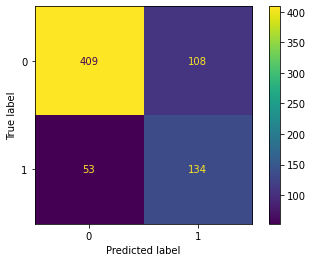

In [29]:
cm_rfc = confusion_matrix(y_test, predictions_rfc, labels=random_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=random_search.classes_)
disp.plot()
plt.show()

 **- AdaBoostClassifier**

In [30]:
# 4. Инициализируем модель
# Базовый классификатор - DecisionTreeClassifier с увеличенной глубиной
base_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')  # Увеличиваем глубину дерева

# Модель AdaBoost
ada_model = AdaBoostClassifier(estimator=base_model)

# 5. Сетка гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 500],   # Увеличиваем количество классификаторов
    'learning_rate': [0.01, 0.05, 0.1, 0.5],  # Пробуем различные значения learning_rate
    'algorithm': ['SAMME.R', 'SAMME']  # Используем оба алгоритма
}

# 6. GridSearch с метрикой recall
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='recall')
grid_search.fit(X_train, y_train)

# 7. Предсказания
predictions_ada_model = grid_search.predict(X_test)

# 8. Оценка качества
print(classification_report(y_test, predictions_ada_model, target_names=['No', 'Yes']))

# Лучшие параметры
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score   support

          No       0.89      0.75      0.81       517
         Yes       0.51      0.74      0.61       187

    accuracy                           0.75       704
   macro avg       0.70      0.74      0.71       704
weighted avg       0.79      0.75      0.76       704

Best parameters found: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}


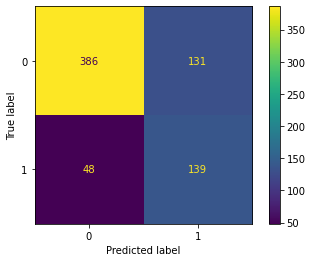

In [31]:
cm_ada_model = confusion_matrix(y_test, predictions_ada_model, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada_model, display_labels=grid_search.classes_)
disp.plot()
plt.show()

 **- GradientBoostingClassifier**

In [32]:
# 4. Инициализируем модель 
gb_model = GradientBoostingClassifier(random_state=42)

# 5. Сетка гиперпараметров для оптимизации
param_grid = {
    'n_estimators': [50, 100],   # Количество деревьев
    'learning_rate': [0.01, 0.05],     # Темп обучения
    'max_depth': [3, 5],               # Глубина деревьев
    'min_samples_split': [2, 5],       # Минимум для разбиения
    'min_samples_leaf': [1, 2],        # Минимум для листьев
    'subsample': [0.8, 1.0],           # Доля данных для каждого дерева
    'max_features': ['sqrt', 'log2']   # Признаки для разбиения
}

# 6. GridSearch для подбора гиперпараметров с метрикой f1
grid_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Подгонка с весами
grid_gb.fit(X_train, y_train, sample_weight=weights)

# 7. Предсказания
predictions_gb = grid_gb.predict(X_test)

# 8. Оценка качества
print(classification_report(y_test, predictions_gb, target_names=['No', 'Yes']))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
              precision    recall  f1-score   support

          No       0.90      0.77      0.83       517
         Yes       0.54      0.75      0.63       187

    accuracy                           0.76       704
   macro avg       0.72      0.76      0.73       704
weighted avg       0.80      0.76      0.77       704



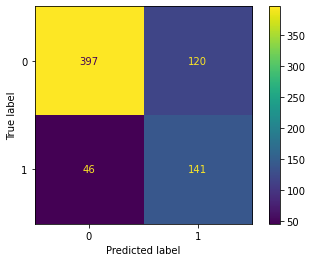

In [33]:
cm_gb_model = confusion_matrix(y_test, predictions_gb, labels=grid_gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb_model, display_labels=grid_gb.classes_)
disp.plot()
plt.show()

**Выводы**

В ходе сравнительного анализа четырех алгоритмов, основанных на деревьях решений, были получены следующие результаты.

Модель **Decision Tree** продемонстрировала относительно высокий уровень полноты (Recall = 0.74) для положительного класса (Churn = Yes), однако при этом точность (Precision = 0.51) оказалась достаточно низкой, что указывает на склонность модели к избыточному количеству ложноположительных прогнозов.

Алгоритм **Random Forest** показал более сбалансированные результаты, улучшив точность положительного класса до 0.55 при незначительном снижении полноты (Recall = 0.72). Это свидетельствует о лучшей способности модели находить компромисс между верным определением ушедших клиентов и минимизацией ошибок классификации.

Модель **AdaBoost** сохранила высокую полноту (Recall = 0.74), аналогичную дереву решений, однако точность положительного класса (0.54) оказалась сопоставимой с результатами случайного леса. Таким образом, эффективность данной модели находится между результатами Random Forest и Gradient Boosting.

Наиболее высокий показатель F1-меры для положительного класса был достигнут с помощью **Gradient Boosting** (F1 = 0.63), при этом полнота (Recall = 0.75) также оказалась максимальной среди рассмотренных моделей. Это свидетельствует о наилучшей способности алгоритма выявлять клиентов, склонных к оттоку, сохраняя при этом приемлемый уровень точности.

Выбор модели зависит от финальной цели анализа:  

 - если ключевая задача заключается в максимальном выявлении клиентов, находящихся в зоне риска, оптимальным выбором является **Gradient Boosting**;  

 - если важен баланс между полнотой и точностью, предпочтительнее использовать **Random Forest**.  

Таким образом, модели на основе деревьев решений (Decision Tree, Random Forest, AdaBoost, Gradient Boosting) позволяют выявить значительную часть клиентов, находящихся в зоне риска. Однако из-за невысокой точности их предсказания пока не могут считаться оптимальными для практического применения.

Для повышения их эффективности требуется:  
- улучшение качества данных (например, создание новых признаков — feature engineering),  
- использование методов балансировки классов (SMOTE, undersampling, oversampling),  
- тестирование более современных моделей (например, XGBoost, LightGBM, CatBoost).  